In [2]:
import pandas as pd

**Function for CSV reading from large dataset of traffic**

This function extract any given traffic data csv and extract information into a dataframe that can be used later
- direction (south or north lane)
- time frame
- total volum of cars 
- each volum of cars by car-sizes 

In [3]:
start_date = "2023-10-31"              
end_date = "2024-10-31"  

In [4]:
#for dataset without ; as seperator 
def process_traffic_data(file_path, start_date, end_date):
    # Load the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)

    # Ensure the "Dato" column is a datetime format for filtering
    df['Dato'] = pd.to_datetime(df['Dato'], format='%Y-%m-%d')

    # Filter the rows based on the date range
    df = df[(df['Dato'] >= pd.to_datetime(start_date)) & (df['Dato'] <= pd.to_datetime(end_date))]

    # Filter rows to keep only those where "Felt" starts with "Totalt i retning "
    df = df[df["Felt"].str.startswith("Totalt i retning ")]

    # List to store output data
    output_data = []

    # Loop through each unique hour and collect results
    grouped = df.groupby(["Dato", "Fra tidspunkt"])
    for (date, time_range), group in grouped:
        # Get unique directions for this group (e.g., different cities)
        directions = group["Felt"].unique()
        
        for direction in directions:
            direction_data = group[group["Felt"] == direction]
            if not direction_data.empty:
                total_cars = direction_data["Trafikkmengde"].values[0]
                car_sizes = {
                    "< 5,6m": direction_data["< 5,6m"].values[0],
                    ">= 5,6m": direction_data[">= 5,6m"].values[0],
                    "5,6m - 7,6m": direction_data["5,6m - 7,6m"].values[0],
                    "7,6m - 12,5m": direction_data["7,6m - 12,5m"].values[0],
                    "12,5m - 16,0m": direction_data["12,5m - 16,0m"].values[0],
                    ">= 16,0m": direction_data[">= 16,0m"].values[0],
                    "16,0m - 24,0m": direction_data["16,0m - 24,0m"].values[0],
                    ">= 24,0m": direction_data[">= 24,0m"].values[0],
                }
                
                # Append a row of data to the list
                output_data.append({
                    "Date": date.strftime('%Y-%m-%d'),
                    "Time Range": time_range,
                    "Direction": direction,
                    "Total Cars": total_cars,
                    "< 5.6m": car_sizes["< 5,6m"],
                    ">= 5.6m": car_sizes[">= 5,6m"],
                    "5.6m - 7.6m": car_sizes["5,6m - 7,6m"],
                    "7.6m - 12.5m": car_sizes["7,6m - 12,5m"],
                    "12.5m - 16.0m": car_sizes["12,5m - 16,0m"],
                    ">= 16.0m": car_sizes[">= 16,0m"],
                    "16.0m - 24.0m": car_sizes["16,0m - 24,0m"],
                    ">= 24.0m": car_sizes[">= 24,0m"]
                })

    # Convert the list of dictionaries to a DataFrame
    output_df = pd.DataFrame(output_data)

    # Return the DataFrame for further use
    return output_df 

In [5]:
#for dataset wit ; as seperator 
def process_traffic_data_sep(file_path, start_date, end_date):
    # Load the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path,sep=';')

    # Ensure the "Dato" column is a datetime format for filtering
    df['Dato'] = pd.to_datetime(df['Dato'], format='%Y-%m-%d')

    # Filter the rows based on the date range
    df = df[(df['Dato'] >= pd.to_datetime(start_date)) & (df['Dato'] <= pd.to_datetime(end_date))]

    # Filter rows to keep only those where "Felt" starts with "Totalt i retning "
    df = df[df["Felt"].str.startswith("Totalt i retning ")]

    # List to store output data
    output_data = []

    # Loop through each unique hour and collect results
    grouped = df.groupby(["Dato", "Fra tidspunkt"])
    for (date, time_range), group in grouped:
        # Get unique directions for this group (e.g., different cities)
        directions = group["Felt"].unique()
        
        for direction in directions:
            direction_data = group[group["Felt"] == direction]
            if not direction_data.empty:
                total_cars = direction_data["Trafikkmengde"].values[0]
                car_sizes = {
                    "< 5,6m": direction_data["< 5,6m"].values[0],
                    ">= 5,6m": direction_data[">= 5,6m"].values[0],
                    "5,6m - 7,6m": direction_data["5,6m - 7,6m"].values[0],
                    "7,6m - 12,5m": direction_data["7,6m - 12,5m"].values[0],
                    "12,5m - 16,0m": direction_data["12,5m - 16,0m"].values[0],
                    ">= 16,0m": direction_data[">= 16,0m"].values[0],
                    "16,0m - 24,0m": direction_data["16,0m - 24,0m"].values[0],
                    ">= 24,0m": direction_data[">= 24,0m"].values[0],
                }
                
                # Append a row of data to the list
                output_data.append({
                    "Date": date.strftime('%Y-%m-%d'),
                    "Time Range": time_range,
                    "Direction": direction,
                    "Total Cars": total_cars,
                    "< 5.6m": car_sizes["< 5,6m"],
                    ">= 5.6m": car_sizes[">= 5,6m"],
                    "5.6m - 7.6m": car_sizes["5,6m - 7,6m"],
                    "7.6m - 12.5m": car_sizes["7,6m - 12,5m"],
                    "12.5m - 16.0m": car_sizes["12,5m - 16,0m"],
                    ">= 16.0m": car_sizes[">= 16,0m"],
                    "16.0m - 24.0m": car_sizes["16,0m - 24,0m"],
                    ">= 24.0m": car_sizes[">= 24,0m"]
                })

    # Convert the list of dictionaries to a DataFrame
    output_df = pd.DataFrame(output_data)

    # Return the DataFrame for further use
    return output_df

In [6]:
#for dataset need encoded and seperator 
def process_traffic_data_encoded(file_path, start_date, end_date):
    # Load the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path, encoding='ISO-8859-1', sep=';')

    # Ensure the "Dato" column is a datetime format for filtering
    df['Dato'] = pd.to_datetime(df['Dato'], format='%Y-%m-%d')

    # Filter the rows based on the date range
    df = df[(df['Dato'] >= pd.to_datetime(start_date)) & (df['Dato'] <= pd.to_datetime(end_date))]

    # Filter rows to keep only those where "Felt" starts with "Totalt i retning "
    df = df[df["Felt"].str.startswith("Totalt i retning ")]

    # List to store output data
    output_data = []

    # Loop through each unique hour and collect results
    grouped = df.groupby(["Dato", "Fra tidspunkt"])
    for (date, time_range), group in grouped:
        # Get unique directions for this group (e.g., different cities)
        directions = group["Felt"].unique()
        
        for direction in directions:
            direction_data = group[group["Felt"] == direction]
            if not direction_data.empty:
                total_cars = direction_data["Trafikkmengde"].values[0]
                car_sizes = {
                    "< 5,6m": direction_data["< 5,6m"].values[0],
                    ">= 5,6m": direction_data[">= 5,6m"].values[0],
                    "5,6m - 7,6m": direction_data["5,6m - 7,6m"].values[0],
                    "7,6m - 12,5m": direction_data["7,6m - 12,5m"].values[0],
                    "12,5m - 16,0m": direction_data["12,5m - 16,0m"].values[0],
                    ">= 16,0m": direction_data[">= 16,0m"].values[0],
                    "16,0m - 24,0m": direction_data["16,0m - 24,0m"].values[0],
                    ">= 24,0m": direction_data[">= 24,0m"].values[0],
                }
                
                # Append a row of data to the list
                output_data.append({
                    "Date": date.strftime('%Y-%m-%d'),
                    "Time Range": time_range,
                    "Direction": direction,
                    "Total Cars": total_cars,
                    "< 5.6m": car_sizes["< 5,6m"],
                    ">= 5.6m": car_sizes[">= 5,6m"],
                    "5.6m - 7.6m": car_sizes["5,6m - 7,6m"],
                    "7.6m - 12.5m": car_sizes["7,6m - 12,5m"],
                    "12.5m - 16.0m": car_sizes["12,5m - 16,0m"],
                    ">= 16.0m": car_sizes[">= 16,0m"],
                    "16.0m - 24.0m": car_sizes["16,0m - 24,0m"],
                    ">= 24.0m": car_sizes[">= 24,0m"]
                })

    # Convert the list of dictionaries to a DataFrame
    output_df = pd.DataFrame(output_data)

    # Return the DataFrame for further use
    return output_df


The direction of our total outline map is as follow:

Most South (close to Oslo):

Helsfyr -> 

-> Alnabru south/north-> 

-> Leira bru (Eidsvoll)

-> Lindeberg south/north-> 

-> Furuset south/north-> 

-> Karihaugen ->

-> Hvam ->

-> Skedsmokorset ->

-> Jessheim ->

-> Mogreinakrysset - >

-> Dalkrysset 


Most North (close to Dal): 

**Importing all dataset according to both direction south and north seperately**

In [7]:
file_path = "Helsfyr_filtered.csv"    
helsfyr_df = process_traffic_data(file_path, start_date, end_date)
helsfyr_n = helsfyr_df[helsfyr_df['Direction'] == 'Totalt i retning Alnabru']
helsfyr_s = helsfyr_df[helsfyr_df['Direction'] == 'Totalt i retning Sentrum']

In [7]:
file_path = "AlnabruNord.csv"    
alna_nord = process_traffic_data_encoded(file_path, start_date, end_date)
alna_n = alna_nord[alna_nord['Direction'] == 'Totalt i retning Helsfyr']

file_path = "AlnabruSouth.csv"    
alna_south = process_traffic_data_encoded(file_path, start_date, end_date)
alna_s = alna_south[alna_south['Direction'] == 'Totalt i retning Helsfyr']

<ipython-input-5-34cdc33c9cab>:4: DtypeWarning: Columns (9,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='ISO-8859-1', sep=';')
<ipython-input-5-34cdc33c9cab>:4: DtypeWarning: Columns (9,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='ISO-8859-1', sep=';')


In [8]:
file_path = "Leirabru.csv"    
leira_df = process_traffic_data_sep(file_path, start_date, end_date)
leira_n = leira_df[leira_df['Direction'] == 'Totalt i retning Hamar']
leira_s = leira_df[leira_df['Direction'] == 'Totalt i retning Oslo']

<ipython-input-4-b94882d7bce1>:4: DtypeWarning: Columns (16,17,18,19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path,sep=';')


In [9]:
file_path = "LindebergNord.csv"    
lind_nord = process_traffic_data_encoded(file_path, start_date, end_date)
lind_n = lind_nord[lind_nord['Direction'] == 'Totalt i retning Karihaugen']

file_path = "LindebergSouth.csv"    
lind_south = process_traffic_data_encoded(file_path, start_date, end_date)
lind_s = lind_south[lind_south['Direction'] == 'Totalt i retning Alnabru']

<ipython-input-5-34cdc33c9cab>:4: DtypeWarning: Columns (9,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='ISO-8859-1', sep=';')


In [10]:
file_path = "FurusetNord.csv"    
furu_nord = process_traffic_data_encoded(file_path, start_date, end_date)
furu_n = furu_nord[furu_nord['Direction'] == 'Totalt i retning Karihaugen']

file_path = "FurusetSouth.csv"    
furu_south = process_traffic_data_encoded(file_path, start_date, end_date)
furu_s = furu_south[furu_south['Direction'] == 'Totalt i retning Alna']

In [11]:
file_path = "Karihaugen.csv"    
kari_df = process_traffic_data_sep(file_path, start_date, end_date)
kari_n = kari_df[kari_df['Direction'] == 'Totalt i retning Akershus grense']
kari_s = kari_df[kari_df['Direction'] == 'Totalt i retning Karihaugen']

In [12]:
file_path = "Hvam.csv"    
hvam1_df = process_traffic_data_encoded(file_path, start_date, end_date)
hvam1_n = hvam1_df[hvam1_df['Direction'] == 'Totalt i retning HAMAR']
hvam1_s = hvam1_df[hvam1_df['Direction'] == 'Totalt i retning OSLO']

<ipython-input-5-34cdc33c9cab>:4: DtypeWarning: Columns (9,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='ISO-8859-1', sep=';')


In [13]:
file_path = "HvamNord.csv"    
hvam2_df = process_traffic_data_sep(file_path, start_date, end_date)
hvam2_n = hvam2_df[hvam2_df['Direction'] == 'Totalt i retning SKEDSMOVOLLEN']
hvam2_s = hvam2_df[hvam2_df['Direction'] == 'Totalt i retning OSLO']

In [14]:
file_path = "Skedsmovollen.csv"    
sked_df = process_traffic_data_sep(file_path, start_date, end_date)
sked_n = sked_df[sked_df['Direction'] == 'Totalt i retning Hamar']
sked_s = sked_df[sked_df['Direction'] == 'Totalt i retning Oslo']

In [15]:
file_path = "Jessheim.csv"    
jess_df = process_traffic_data_sep(file_path, start_date, end_date)
jess_n = jess_df[jess_df['Direction'] == 'Totalt i retning Hamar']
jess_s = jess_df[jess_df['Direction'] == 'Totalt i retning Oslo']

<ipython-input-4-b94882d7bce1>:4: DtypeWarning: Columns (16,17,18,19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path,sep=';')


In [16]:
file_path = "Mogreinakrysset.csv"    
mogre_df = process_traffic_data_sep(file_path, start_date, end_date)
mogre_n = mogre_df[mogre_df['Direction'] == 'Totalt i retning HAMAR']
mogre_s = mogre_df[mogre_df['Direction'] == 'Totalt i retning OSLO']

In [17]:
file_path = "Dalkrysset.csv"    
dal_df = process_traffic_data_sep(file_path, start_date, end_date)
dal_n = dal_df[mogre_df['Direction'] == 'Totalt i retning HAMAR']
dal_s = dal_df[mogre_df['Direction'] == 'Totalt i retning OSLO']

<ipython-input-4-b94882d7bce1>:4: DtypeWarning: Columns (9,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path,sep=';')


**Weather Data**

In [18]:
pip install openmeteo-requests

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install requests-cache retry-requests numpy pandas

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install openmeteo-requests

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
import requests_cache
import openmeteo_requests
import pandas as pd
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = 3600)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://api.open-meteo.com/v1/forecast"
params = {
	"latitude": 59.911491,
	"longitude": 10.757933,
	"hourly": ["temperature_2m", "precipitation", "rain", "showers", "snowfall", "visibility", "wind_speed_10m", "wind_speed_80m", "wind_direction_10m", "wind_direction_80m"],
	"timezone": "Europe/Berlin",
	"start_date": "2023-10-31",
	"end_date": "2024-10-31"
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
hourly_precipitation = hourly.Variables(1).ValuesAsNumpy()
hourly_rain = hourly.Variables(2).ValuesAsNumpy()
hourly_showers = hourly.Variables(3).ValuesAsNumpy()
hourly_snowfall = hourly.Variables(4).ValuesAsNumpy()
hourly_visibility = hourly.Variables(5).ValuesAsNumpy()
hourly_wind_speed_10m = hourly.Variables(6).ValuesAsNumpy()
hourly_wind_speed_80m = hourly.Variables(7).ValuesAsNumpy()
hourly_wind_direction_10m = hourly.Variables(8).ValuesAsNumpy()
hourly_wind_direction_80m = hourly.Variables(9).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}
hourly_data["temperature_2m"] = hourly_temperature_2m
hourly_data["precipitation"] = hourly_precipitation
hourly_data["rain"] = hourly_rain
hourly_data["showers"] = hourly_showers
hourly_data["snowfall"] = hourly_snowfall
hourly_data["visibility"] = hourly_visibility
hourly_data["wind_speed_10m"] = hourly_wind_speed_10m
hourly_data["wind_speed_80m"] = hourly_wind_speed_80m
hourly_data["wind_direction_10m"] = hourly_wind_direction_10m
hourly_data["wind_direction_80m"] = hourly_wind_direction_80m

hourly_dataframe = pd.DataFrame(data = hourly_data)


Coordinates 59.91584396362305°N 10.760787963867188°E
Elevation 10.0 m asl
Timezone b'Europe/Berlin' b'CET'
Timezone difference to GMT+0 3600 s


**Note that there are a lot of NaN value in our dataset. To have better model, we will replace all NaN value in the following way**

- If the distribution is relatively normal, we will repalce with mean

- If skewed distribution we will replace with median

- If catagorical or discrete numerical, we will replace with mode value

However! We are training a fuzzy system program based on traffic data and corresponding hourly weather data, handling missing (NaN) values is critical. Dropping rows or columns with NaN values might lead to the loss of valuable information, especially if traffic data for specific dates and hours becomes unmatched with weather data

Thus, we 

1. avoid on dropping coloumns and trying K Nearest Neighbour (KNN) for values filling

2. Fuzzy Logic-Based Imputation: Fuzzy systems can handle uncertainty better by assigning weights to potential values based on membership functions (e.g., triangular or Gaussian). This approach can be particularly useful when dealing with traffic and weather data together.

In [10]:
print(hourly_dataframe.isnull().sum())

date                     0
temperature_2m        7057
precipitation         7055
rain                  7055
showers               7055
snowfall              7055
visibility            7163
wind_speed_10m        7057
wind_speed_80m        7066
wind_direction_10m    7057
wind_direction_80m    7066
dtype: int64


In [22]:
# Extract date (year-month-day), start (hour-minute-second), and end (timezone offset)
hourly_dataframe['Date'] = hourly_dataframe['date'].dt.strftime('%Y-%m-%d')  # Extract year-month-day
hourly_dataframe['Time Range'] = hourly_dataframe['date'].dt.strftime('%H:%M:%S')  
hourly_dataframe = hourly_dataframe.drop(columns=['date'])


In [23]:
hourly_dataframe.head(5)

,temperature_2m,precipitation,rain,showers,snowfall,visibility,wind_speed_10m,wind_speed_80m,wind_direction_10m,wind_direction_80m,Date,Time Range
0,12.818364,0.141358,0.141358,0.0,0.0,28483.318359,9.946229,14.955927,141.180893,152.652847,2023-10-30,23:00:00
1,12.818364,0.141358,0.141358,0.0,0.0,28483.318359,9.946229,14.955927,141.180893,152.652847,2023-10-31,00:00:00
2,12.818364,0.141358,0.141358,0.0,0.0,28483.318359,9.946229,14.955927,141.180893,152.652847,2023-10-31,01:00:00
3,12.818364,0.141358,0.141358,0.0,0.0,28483.318359,9.946229,14.955927,141.180893,152.652847,2023-10-31,02:00:00
4,12.818364,0.141358,0.141358,0.0,0.0,28483.318359,9.946229,14.955927,141.180893,152.652847,2023-10-31,03:00:00


In [24]:
hourly_dataframe.groupby(hourly_dataframe['Date']).mean()

<ipython-input-24-a9c93c25dd5f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hourly_dataframe.groupby(hourly_dataframe['Date']).mean()


,temperature_2m,precipitation,rain,showers,snowfall,visibility,wind_speed_10m,wind_speed_80m,wind_direction_10m,wind_direction_80m
Date,,,,,,,,,,
2023-10-30,12.818364,0.141358,0.141358,0.0,0.0,28483.318359,9.946229,14.955927,141.180893,152.652847
2023-10-31,12.818364,0.141358,0.141358,0.0,0.0,28483.318359,9.946229,14.955928,141.180893,152.652847
2023-11-01,12.818364,0.141358,0.141358,0.0,0.0,28483.318359,9.946229,14.955928,141.180893,152.652847
2023-11-02,12.818364,0.141358,0.141358,0.0,0.0,28483.318359,9.946229,14.955928,141.180893,152.652847
2023-11-03,12.818364,0.141358,0.141358,0.0,0.0,28483.318359,9.946229,14.955928,141.180893,152.652847
...,...,...,...,...,...,...,...,...,...,...
2024-10-27,10.423333,0.604167,0.604167,0.0,0.0,33360.832031,14.009999,27.926147,195.208328,192.626648
2024-10-28,8.219167,0.000000,0.000000,0.0,0.0,37759.167969,10.559999,13.286332,139.416672,160.299149
2024-10-29,6.021250,0.000000,0.000000,0.0,0.0,14554.166992,6.615000,9.935407,142.750000,150.761673


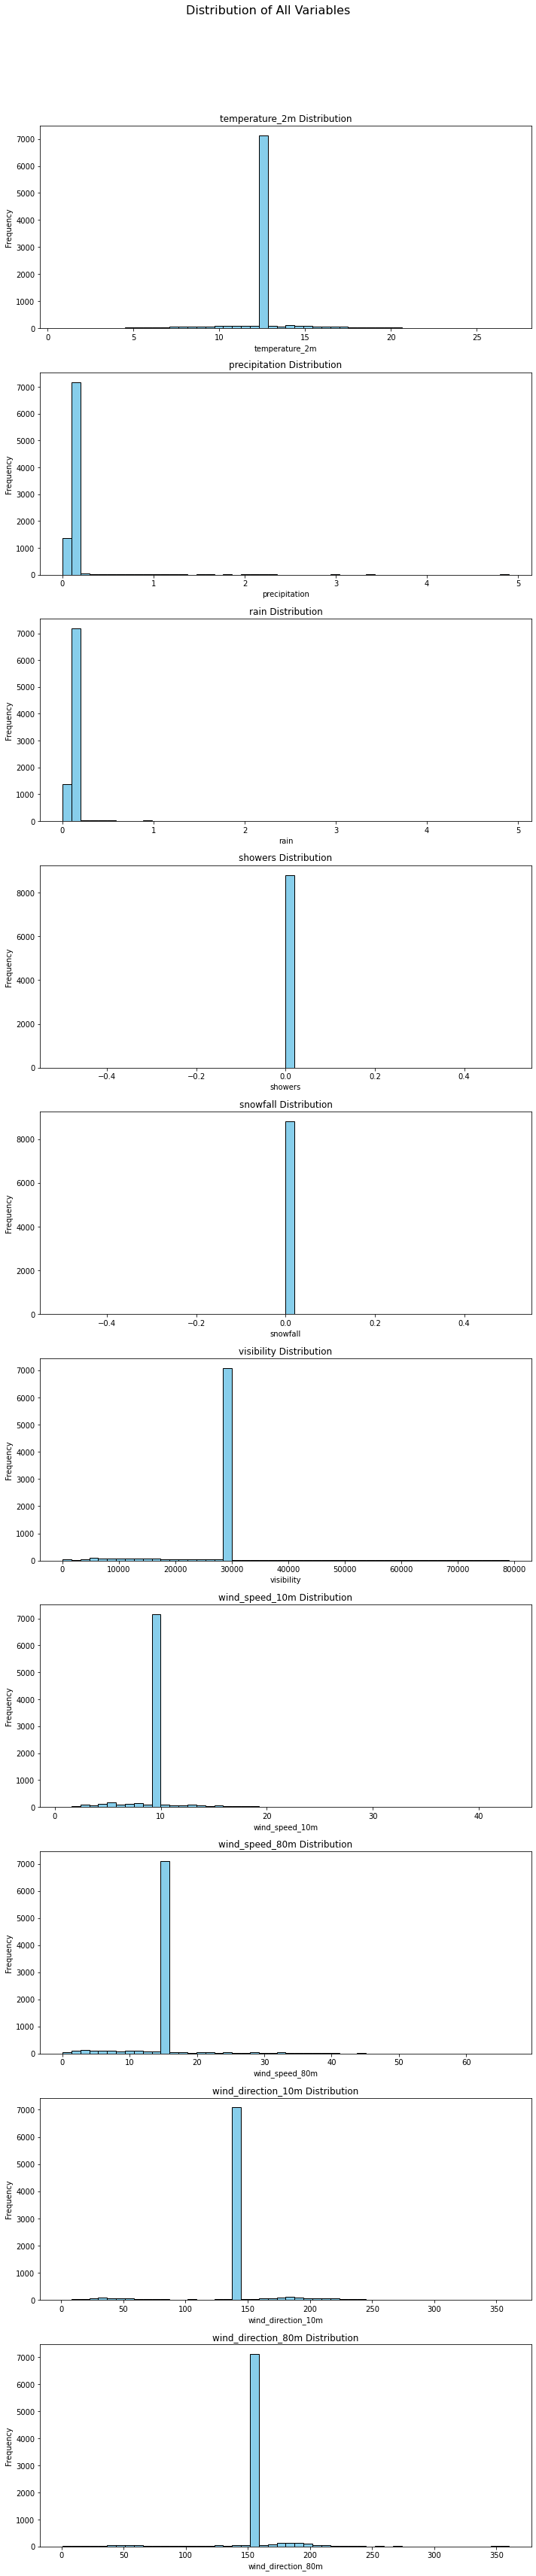

In [25]:
import matplotlib.pyplot as plt

# Exclude the 'date' column if it's present
variables = hourly_dataframe.select_dtypes(include=['float', 'int']).columns  # Select only numeric columns

# Determine the number of rows and columns for subplots
num_vars = len(variables)
fig, axes = plt.subplots(nrows=num_vars, ncols=1, figsize=(10, 5 * num_vars))
fig.suptitle('Distribution of All Variables', fontsize=16)

# Plot each variable's histogram
for i, var in enumerate(variables):
    ax = axes[i] if num_vars > 1 else axes  # Handle single or multiple subplots
    hourly_dataframe[var].plot(kind='hist', bins=50, ax=ax, color='skyblue', edgecolor='black')
    ax.set_title(f'{var} Distribution')
    ax.set_xlabel(var)
    ax.set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [26]:
# Import necessary libraries
from sklearn.impute import KNNImputer

# Define the columns to apply KNN imputation
target_columns = [
    'temperature_2m', 'precipitation', 'rain', 'showers', 'snowfall',
    'visibility', 'wind_speed_10m', 'wind_speed_80m',
    'wind_direction_10m', 'wind_direction_80m'
]

# Initialize the KNN Imputer with k neighbors
imputer = KNNImputer(n_neighbors=10)

# Apply KNN Imputation only to the target columns
hourly_dataframe[target_columns] = imputer.fit_transform(hourly_dataframe[target_columns])

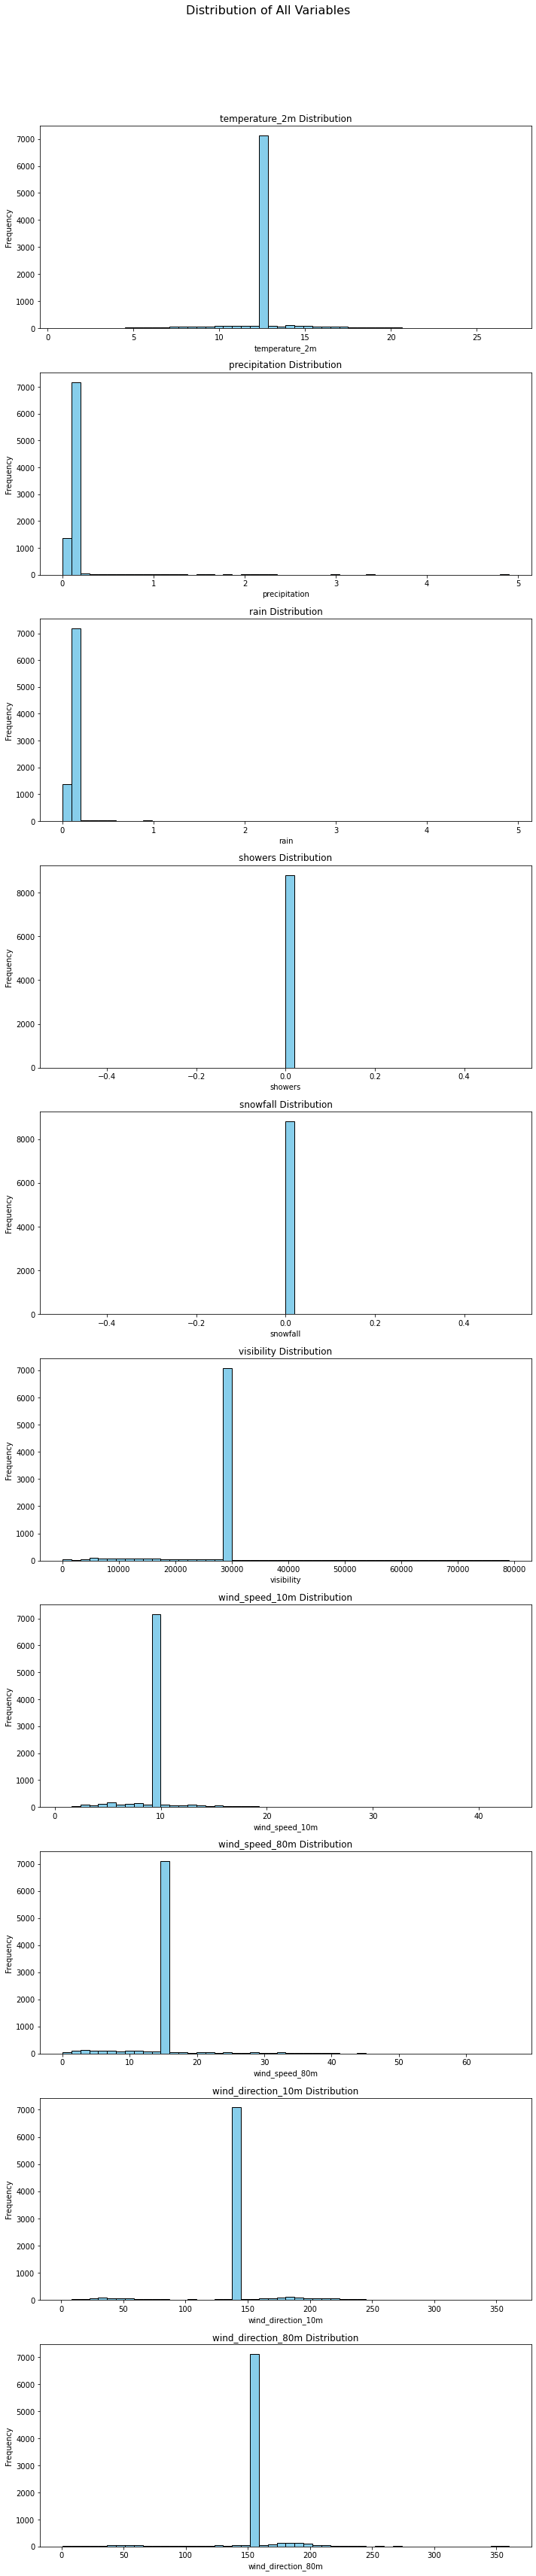

In [27]:
import matplotlib.pyplot as plt

# Exclude the 'date' column if it's present
variables = hourly_dataframe.select_dtypes(include=['float', 'int']).columns  # Select only numeric columns

# Determine the number of rows and columns for subplots
num_vars = len(variables)
fig, axes = plt.subplots(nrows=num_vars, ncols=1, figsize=(10, 5 * num_vars))
fig.suptitle('Distribution of All Variables', fontsize=16)

# Plot each variable's histogram
for i, var in enumerate(variables):
    ax = axes[i] if num_vars > 1 else axes  # Handle single or multiple subplots
    hourly_dataframe[var].plot(kind='hist', bins=50, ax=ax, color='skyblue', edgecolor='black')
    ax.set_title(f'{var} Distribution')
    ax.set_xlabel(var)
    ax.set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

There seems to be quite large amount of NaN values in our dataset based on the chagne in distribution graph in comapred. 

We identify this could actually be worse of because  

- the **imputed values will overrepresent** and dominate the dataset, creating spikes in the distribution. This further will distort Fuzzy's Membership Functions.

- the data set will **lose variability and might even introduce bias** to our fuzzy system training and fuzzy rules might activate incorrectly.


Thus, **handling missing values in time-dependent weather data** here is used 

- groupby dataframe of each day for mean value of all variables
- fill in all NaN varaibles accroding to its date and its column
- for groupby mean is still NaN we fill in using numerical value 0

In [28]:
hourly_dataframe

,temperature_2m,precipitation,rain,showers,snowfall,visibility,wind_speed_10m,wind_speed_80m,wind_direction_10m,wind_direction_80m,Date,Time Range
0,12.818364,0.141358,0.141358,0.0,0.0,28483.318359,9.946229,14.955927,141.180893,152.652847,2023-10-30,23:00:00
1,12.818364,0.141358,0.141358,0.0,0.0,28483.318359,9.946229,14.955927,141.180893,152.652847,2023-10-31,00:00:00
2,12.818364,0.141358,0.141358,0.0,0.0,28483.318359,9.946229,14.955927,141.180893,152.652847,2023-10-31,01:00:00
3,12.818364,0.141358,0.141358,0.0,0.0,28483.318359,9.946229,14.955927,141.180893,152.652847,2023-10-31,02:00:00
4,12.818364,0.141358,0.141358,0.0,0.0,28483.318359,9.946229,14.955927,141.180893,152.652847,2023-10-31,03:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
8803,12.464999,0.000000,0.000000,0.0,0.0,35080.000000,22.680000,33.620991,217.000000,192.994614,2024-10-31,18:00:00
8804,12.014999,0.000000,0.000000,0.0,0.0,33060.000000,20.160000,34.877293,207.000000,191.309891,2024-10-31,19:00:00
8805,12.115000,0.000000,0.000000,0.0,0.0,24540.000000,12.240000,36.644039,211.000000,190.757919,2024-10-31,20:00:00
8806,12.014999,0.000000,0.000000,0.0,0.0,29280.000000,11.159999,40.737305,204.000000,191.210587,2024-10-31,21:00:00


In [29]:
import pandas as pd

# Group by 'Date' and calculate the mean for each variable
grouped_means = hourly_dataframe.groupby('Date').mean()

# Replace NaN values in each column with the corresponding date's mean
for column in grouped_means.columns:
    hourly_dataframe[column] = hourly_dataframe.apply(
        lambda row: grouped_means.loc[row['Date'], column] 
        if pd.isna(row[column]) else row[column], axis=1
    )

# Replace any remaining NaN values (where both the value and date's mean are NaN) with 0
hourly_dataframe.fillna(0, inplace=True)

<ipython-input-29-4c86096e99f9>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_means = hourly_dataframe.groupby('Date').mean()


In [30]:
print(hourly_dataframe.isnull().sum())

temperature_2m        0
precipitation         0
rain                  0
showers               0
snowfall              0
visibility            0
wind_speed_10m        0
wind_speed_80m        0
wind_direction_10m    0
wind_direction_80m    0
Date                  0
Time Range            0
dtype: int64


In [31]:
hourly_dataframe

,temperature_2m,precipitation,rain,showers,snowfall,visibility,wind_speed_10m,wind_speed_80m,wind_direction_10m,wind_direction_80m,Date,Time Range
0,12.818364,0.141358,0.141358,0.0,0.0,28483.318359,9.946229,14.955927,141.180893,152.652847,2023-10-30,23:00:00
1,12.818364,0.141358,0.141358,0.0,0.0,28483.318359,9.946229,14.955927,141.180893,152.652847,2023-10-31,00:00:00
2,12.818364,0.141358,0.141358,0.0,0.0,28483.318359,9.946229,14.955927,141.180893,152.652847,2023-10-31,01:00:00
3,12.818364,0.141358,0.141358,0.0,0.0,28483.318359,9.946229,14.955927,141.180893,152.652847,2023-10-31,02:00:00
4,12.818364,0.141358,0.141358,0.0,0.0,28483.318359,9.946229,14.955927,141.180893,152.652847,2023-10-31,03:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
8803,12.464999,0.000000,0.000000,0.0,0.0,35080.000000,22.680000,33.620991,217.000000,192.994614,2024-10-31,18:00:00
8804,12.014999,0.000000,0.000000,0.0,0.0,33060.000000,20.160000,34.877293,207.000000,191.309891,2024-10-31,19:00:00
8805,12.115000,0.000000,0.000000,0.0,0.0,24540.000000,12.240000,36.644039,211.000000,190.757919,2024-10-31,20:00:00
8806,12.014999,0.000000,0.000000,0.0,0.0,29280.000000,11.159999,40.737305,204.000000,191.210587,2024-10-31,21:00:00


**Combine Datasets**

Merging two dataset: Helsfyr South (to Oslo) and Weather Data of Oslo 

In [32]:
helsfyr_s['Time Range'] = helsfyr_s['Time Range'].apply(lambda x: x[:5])  # Already HH:MM, but ensure consistency
hourly_dataframe['Time Range'] = hourly_dataframe['Time Range'].apply(lambda x: x[:5])  # Convert HH:MM:SS to HH:MM

combined_df = pd.merge(helsfyr_s, hourly_dataframe, on=['Date', 'Time Range'], how='inner')



<ipython-input-32-8aa19306e8e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  helsfyr_s['Time Range'] = helsfyr_s['Time Range'].apply(lambda x: x[:5])  # Already HH:MM, but ensure consistency


In [33]:
combined_df.head(5)

,Date,Time Range,Direction,Total Cars,< 5.6m,>= 5.6m,5.6m - 7.6m,7.6m - 12.5m,12.5m - 16.0m,>= 16.0m,...,temperature_2m,precipitation,rain,showers,snowfall,visibility,wind_speed_10m,wind_speed_80m,wind_direction_10m,wind_direction_80m
0,2023-10-31,00:00,Totalt i retning Sentrum,142,105,36,16,9,3,8,...,12.818364,0.141358,0.141358,0.0,0.0,28483.318359,9.946229,14.955927,141.180893,152.652847
1,2023-10-31,01:00,Totalt i retning Sentrum,162,126,36,5,13,3,15,...,12.818364,0.141358,0.141358,0.0,0.0,28483.318359,9.946229,14.955927,141.180893,152.652847
2,2023-10-31,02:00,Totalt i retning Sentrum,130,96,34,5,4,4,21,...,12.818364,0.141358,0.141358,0.0,0.0,28483.318359,9.946229,14.955927,141.180893,152.652847
3,2023-10-31,03:00,Totalt i retning Sentrum,97,56,41,8,9,5,19,...,12.818364,0.141358,0.141358,0.0,0.0,28483.318359,9.946229,14.955927,141.180893,152.652847
4,2023-10-31,04:00,Totalt i retning Sentrum,125,71,54,7,17,7,23,...,12.818364,0.141358,0.141358,0.0,0.0,28483.318359,9.946229,14.955927,141.180893,152.652847


In [34]:
combined_df.columns

Index(['Date', 'Time Range', 'Direction', 'Total Cars', '< 5.6m', '>= 5.6m',
       '5.6m - 7.6m', '7.6m - 12.5m', '12.5m - 16.0m', '>= 16.0m',
       '16.0m - 24.0m', '>= 24.0m', 'temperature_2m', 'precipitation', 'rain',
       'showers', 'snowfall', 'visibility', 'wind_speed_10m', 'wind_speed_80m',
       'wind_direction_10m', 'wind_direction_80m'],
      dtype='object')

**Feature Engneering**

According to US Dep of Transportation, a publication allow us to calculate the Highway Capacity Calculation. 

- Traffic

1. Vehicle Density per Lane 

$ Density = \frac{Total Cars Volume}{Number of Lanes} $

2. Heavy Vehicle Percentage (%HV)

$ \text{HV Percentage} = \frac{Large Vechcles Volume}{Total Cars Volume} $

- Weather

3. Adjusted Visibility

$ Adjusted Visibility = Visibility \ast (1 - \frac{Percipitation}{10}) $

4. Rush Hour Indicator

According to TomTom Oslo Trffic Rush Hour Indicator 7 -9 AM AND 14 -17 PM is Oslo rush hour.

5. Day Type (Weekday/Weekend): 

According a traffic volume analysis, Weekdays carry larger traffic volumn. 


In [35]:
number_of_lanes = 3

combined_df['Vehicle Density per Lane'] = combined_df['Total Cars'] /  number_of_lanes

combined_df['Adjusted Visibility'] = combined_df['visibility'] * (1 - combined_df['precipitation'] / 10)

heavy_vehicle_columns = ['12.5m - 16.0m', '16.0m - 24.0m', '>= 16.0m', '>= 24.0m']

combined_df['Heavy Vehicle Percentage'] = (
    combined_df[heavy_vehicle_columns].sum(axis=1) / combined_df['Total Cars'] * 100
)


In [36]:
combined_df['Hour'] = pd.to_datetime(combined_df['Time Range'], format='%H:%M').dt.hour

# Step 2: Define rush hour function
def is_rush_hour(hour):
    return 1 if (7 <= hour <= 9 or 14 <= hour <= 17) else 0

combined_df['Rush Hour'] = combined_df['Hour'].apply(is_rush_hour)

In [37]:
combined_df['Date'] = pd.to_datetime(combined_df['Date'])
combined_df['Day of Week'] = combined_df['Date'].dt.dayofweek
combined_df['Is Weekday'] = combined_df['Day of Week'].apply(lambda x: 1 if x < 5 else 0)

\begin{array}{|l|l|l|}
\hline
\textbf{Type} & \textbf{Variable Name} \\ \hline
\textbf{Traffic Input} & Vehicle Density per Lane \\ \hline
\textbf{Traffic Input} & Heavy Vehicle Percentage \\ \hline
\textbf{Weather Input} & Precipitation Intensity \\ \hline
\textbf{Weather Input} & Adjusted Visibility \\ \hline
\textbf{Weather Input} & Wind Speed (10m) \\ \hline
\textbf{Time Input} & Rush Hour\\ \hline
\textbf{Time Input} & WeekdayWeekend\\ \hline
\textbf{Output} & Traffic Level\\ \hline
\end{array}

In [38]:
input_variables = {
    "Vehicle Density per Lane": combined_df['Vehicle Density per Lane'],
    "Heavy Vehicle Percentage": combined_df['Heavy Vehicle Percentage'],
    "Precipitation Intensity": combined_df['precipitation'],
    "Adjusted Visibility": combined_df['Adjusted Visibility'],
    "Wind Speed (10m)": combined_df['wind_speed_10m'],
    "Rush Hour": combined_df['Rush Hour'],
    "Is Weekday": combined_df['Is Weekday'],
}

output_variable = {
    "Traffic Congestion Level": None  # This will be computed by the fuzzy system
}

for key, value in input_variables.items():
    print(f"{key}:")
    print(value.head())

trial_df = pd.DataFrame(input_variables)

Vehicle Density per Lane:
0    47.333333
1    54.000000
2    43.333333
3    32.333333
4    41.666667
Name: Vehicle Density per Lane, dtype: float64
Heavy Vehicle Percentage:
0    13.380282
1    20.370370
2    35.384615
3    44.329897
4    42.400000
Name: Heavy Vehicle Percentage, dtype: float64
Precipitation Intensity:
0    0.141358
1    0.141358
2    0.141358
3    0.141358
4    0.141358
Name: precipitation, dtype: float64
Adjusted Visibility:
0    28080.684793
1    28080.684793
2    28080.684793
3    28080.684793
4    28080.684793
Name: Adjusted Visibility, dtype: float64
Wind Speed (10m):
0    9.946229
1    9.946229
2    9.946229
3    9.946229
4    9.946229
Name: wind_speed_10m, dtype: float64
Rush Hour:
0    0
1    0
2    0
3    0
4    0
Name: Rush Hour, dtype: int64
Is Weekday:
0    1
1    1
2    1
3    1
4    1
Name: Is Weekday, dtype: int64


We need the describe() of all input varaibles to have an overview of our membership function design

In [39]:
trial_df.describe()

,Vehicle Density per Lane,Heavy Vehicle Percentage,Precipitation Intensity,Adjusted Visibility,Wind Speed (10m),Rush Hour,Is Weekday
count,8806.000000,8803.000000,8806.000000,8806.000000,8806.000000,8806.000000,8806.000000
mean,373.820047,12.473012,0.141358,28252.691165,9.945491,0.291733,0.716670
std,253.868408,9.787356,0.213718,9918.804493,2.569747,0.454586,0.450641
min,0.000000,0.000000,0.000000,60.000000,0.720000,0.000000,0.000000
25%,120.416667,6.693692,0.141358,28080.684793,9.946229,0.000000,0.000000
50%,374.666667,10.456554,0.141358,28080.684793,9.946229,0.000000,1.000000
75%,588.916667,13.775510,0.141358,28080.684793,9.946229,1.000000,1.000000
max,918.000000,109.090909,4.900000,79000.000000,42.839996,1.000000,1.000000


**Membership Function**

Here we utilise two kinds of Membership Functions to form our Fuzzy Sets 

- Triangular Membership Function (fuzz.trimf) for extreme values 0 or 1

$ \mu(x) = \left\{ \begin{array}{cl}
0 & , \ x\le \, or \, x\ge c, \\ 
\frac{x-a}{b-a} & , \, x\lt a\le b, \\  
\frac{c-x}{c-b} & , \, b\lt x\le c.
\end{array} \right.  $

- Trapezoidal Membership Function (fuzz.trapmf) for variables with broader ranges 

$ \mu(x) = \left\{ \begin{array}{cl}
0 & , \ x\le a\, or \, x\ge d ,\\ 
\frac{x-a}{b-a} & , \, a\lt x\le b, \\
1 & , \, b\lt x\le c, \\  
\frac{d-x}{d-c} & , \, c\lt x\lt  d.
\end{array} \right.  $

In [40]:
 pip install -U scikit-fuzzy

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [41]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x_density = np.arange(0, 950, 1)  # Extend slightly beyond max for smoothness
x_hv_percentage = np.arange(0, 120, 1)
x_precipitation = np.arange(0, 5.5, 0.1)
x_visibility = np.arange(0, 80000, 100)
x_wind_speed = np.arange(0, 45, 0.5)
x_rush_hour = np.arange(0, 2, 1)  # Binary (0 or 1)
x_is_weekday = np.arange(0, 2, 1)  # Binary (0 or 1)

# Vehicle Density per Lane
veh_density_lo = fuzz.trapmf(x_density, [0, 0, 200, 400])
veh_density_md = fuzz.trapmf(x_density, [300, 400, 600, 700])
veh_density_hi = fuzz.trapmf(x_density, [600, 800, 950, 950])

# Heavy Vehicle Percentage
hv_percentage_lo = fuzz.trapmf(x_hv_percentage, [0, 0, 10, 20])
hv_percentage_md = fuzz.trapmf(x_hv_percentage, [15, 25, 40, 50])
hv_percentage_hi = fuzz.trapmf(x_hv_percentage, [40, 60, 120, 120])

# Precipitation Intensity
precipitation_lo = fuzz.trapmf(x_precipitation, [0, 0, 1.5, 2])
precipitation_md = fuzz.trapmf(x_precipitation, [1.5, 2.5, 3.5, 4])
precipitation_hi = fuzz.trapmf(x_precipitation, [3.5, 4.5, 5.5, 5.5])

# Adjusted Visibility
visibility_lo = fuzz.trapmf(x_visibility, [0, 0, 10000, 20000])
visibility_md = fuzz.trapmf(x_visibility, [15000, 25000, 40000, 50000])
visibility_hi = fuzz.trapmf(x_visibility, [40000, 60000, 80000, 80000])

# Wind Speed (10m)
wind_speed_lo = fuzz.trapmf(x_wind_speed, [0, 0, 5, 10])
wind_speed_md = fuzz.trapmf(x_wind_speed, [5, 10, 15, 20])
wind_speed_hi = fuzz.trapmf(x_wind_speed, [15, 25, 45, 45])

# Rush Hour Membership Functions
rush_hour_not = fuzz.trimf(x_rush_hour, [0, 0, 1])  # Not Rush Hour
rush_hour_yes = fuzz.trimf(x_rush_hour, [0, 1, 1])  # Rush Hour

# Is Weekday Membership Functions
weekday_no = fuzz.trimf(x_is_weekday, [0, 0, 1])  # Weekend
weekday_yes = fuzz.trimf(x_is_weekday, [0, 1, 1])  # Weekday

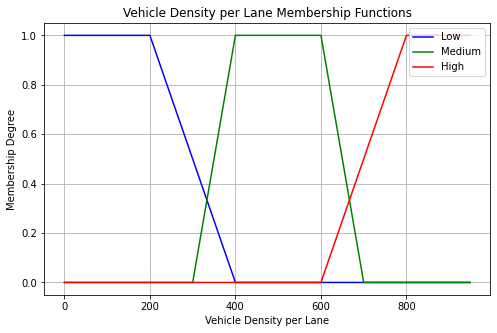

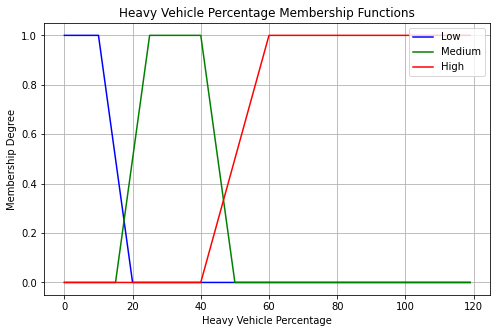

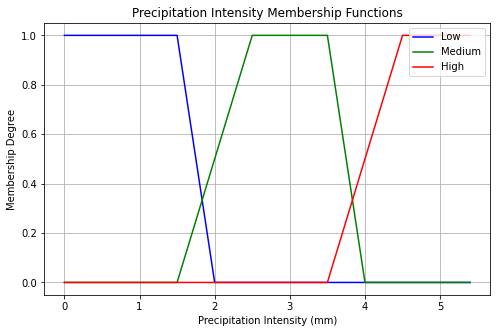

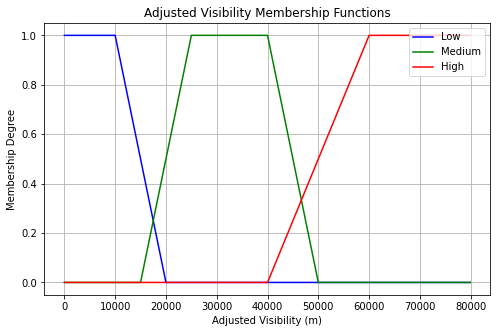

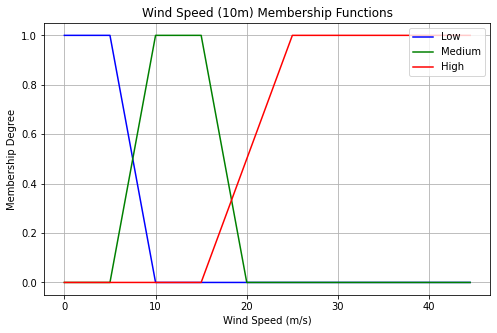

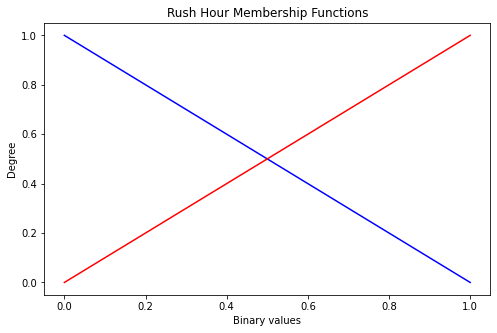

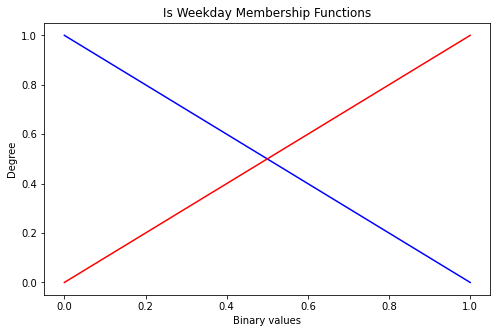

In [42]:
import matplotlib.pyplot as plt

# Visualization for Vehicle Density per Lane
plt.figure(figsize=(8, 5))
plt.plot(x_density, veh_density_lo, 'b', linewidth=1.5, label='Low')
plt.plot(x_density, veh_density_md, 'g', linewidth=1.5, label='Medium')
plt.plot(x_density, veh_density_hi, 'r', linewidth=1.5, label='High')
plt.title('Vehicle Density per Lane Membership Functions')
plt.xlabel('Vehicle Density per Lane')
plt.ylabel('Membership Degree')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Visualization for Heavy Vehicle Percentage
plt.figure(figsize=(8, 5))
plt.plot(x_hv_percentage, hv_percentage_lo, 'b', linewidth=1.5, label='Low')
plt.plot(x_hv_percentage, hv_percentage_md, 'g', linewidth=1.5, label='Medium')
plt.plot(x_hv_percentage, hv_percentage_hi, 'r', linewidth=1.5, label='High')
plt.title('Heavy Vehicle Percentage Membership Functions')
plt.xlabel('Heavy Vehicle Percentage')
plt.ylabel('Membership Degree')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Visualization for Precipitation Intensity
plt.figure(figsize=(8, 5))
plt.plot(x_precipitation, precipitation_lo, 'b', linewidth=1.5, label='Low')
plt.plot(x_precipitation, precipitation_md, 'g', linewidth=1.5, label='Medium')
plt.plot(x_precipitation, precipitation_hi, 'r', linewidth=1.5, label='High')
plt.title('Precipitation Intensity Membership Functions')
plt.xlabel('Precipitation Intensity (mm)')
plt.ylabel('Membership Degree')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Visualization for Adjusted Visibility
plt.figure(figsize=(8, 5))
plt.plot(x_visibility, visibility_lo, 'b', linewidth=1.5, label='Low')
plt.plot(x_visibility, visibility_md, 'g', linewidth=1.5, label='Medium')
plt.plot(x_visibility, visibility_hi, 'r', linewidth=1.5, label='High')
plt.title('Adjusted Visibility Membership Functions')
plt.xlabel('Adjusted Visibility (m)')
plt.ylabel('Membership Degree')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Visualization for Wind Speed (10m)
plt.figure(figsize=(8, 5))
plt.plot(x_wind_speed, wind_speed_lo, 'b', linewidth=1.5, label='Low')
plt.plot(x_wind_speed, wind_speed_md, 'g', linewidth=1.5, label='Medium')
plt.plot(x_wind_speed, wind_speed_hi, 'r', linewidth=1.5, label='High')
plt.title('Wind Speed (10m) Membership Functions')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Membership Degree')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Visualization for Rush Hour
plt.figure(figsize=(8, 5))
plt.plot(x_rush_hour, rush_hour_not, 'b', linewidth=1.5, label='Not Rush Hour')
plt.plot(x_rush_hour, rush_hour_yes, 'r', linewidth=1.5, label='Rush Hour')
plt.title('Rush Hour Membership Functions')
plt.xlabel("Binary values")
plt.ylabel("Degree")
plt.show()

# Visualization for Rush Hour
plt.figure(figsize=(8, 5))
plt.plot(x_is_weekday, weekday_no, 'b', linewidth=1.5, label='Not Rush Hour')
plt.plot(x_is_weekday, weekday_yes, 'r', linewidth=1.5, label='Rush Hour')
plt.title('Is Weekday Membership Functions')
plt.xlabel("Binary values")
plt.ylabel("Degree")
plt.show()

**Fuzzy Rules**

In [43]:
fuzzy_rules = [
#severe congestion
    "IF vehicle_density IS high AND hv_percentage IS high AND rush_hour IS yes, THEN congestion IS severe.",
    "IF precipitation IS high AND adjusted_visibility IS low, THEN congestion IS severe.",
    "IF vehicle_density IS high AND wind_speed IS high, THEN congestion IS severe.",
    "IF hv_percentage IS high AND adjusted_visibility IS low, THEN congestion IS severe.",
    "IF vehicle_density IS medium AND precipitation IS high AND rush_hour IS yes, THEN congestion IS severe.",

#high congestion
    "IF vehicle_density IS high AND hv_percentage IS medium, THEN congestion IS high.",
    "IF precipitation IS medium AND adjusted_visibility IS low, THEN congestion IS high.",
    "IF wind_speed IS medium AND rush_hour IS yes, THEN congestion IS high.",
    "IF vehicle_density IS medium AND hv_percentage IS high, THEN congestion IS high.",
    "IF precipitation IS low AND adjusted_visibility IS low, THEN congestion IS high.",

#medium congestion
    "IF vehicle_density IS medium AND hv_percentage IS medium, THEN congestion IS medium.",
    "IF precipitation IS medium OR (wind_speed IS medium AND adjusted_visibility IS medium), THEN congestion IS medium.",
    "IF (vehicle_density IS low OR hv_percentage IS low) AND (rush_hour IS yes OR is_weekday IS yes), THEN congestion IS medium.",
    "IF precipitation IS low AND wind_speed IS NOT high AND adjusted_visibility IS medium, THEN congestion IS medium.",
    "IF vehicle_density IS high AND precipitation IS low AND rush_hour IS not, THEN congestion IS medium.",

#low congestion
    "IF vehicle_density IS low AND hv_percentage IS medium AND precipitation IS low, THEN congestion IS low.",
    "IF vehicle_density IS medium AND hv_percentage IS low AND rush_hour IS not, THEN congestion IS low.",
    "IF adjusted_visibility IS medium AND precipitation IS low AND wind_speed IS low, THEN congestion IS low.",
    "IF vehicle_density IS low AND hv_percentage IS low AND is_weekday IS no, THEN congestion IS low.",
    "IF (precipitation IS low) OR (adjusted_visibility IS high) AND (wind_speed IS medium), THEN congestion IS low.",

#no congestion
    "IF vehicle_density IS low AND hv_percentage IS low, THEN congestion IS no congestion.",
    "IF (precipitation IS low) AND (adjusted_visibility IS high) AND (wind_speed IS low), THEN congestion IS no congestion.",
    "IF (vehicle_density IS very low) OR (hv_percentage IS very low) AND (rush_hour IS not) AND (is_weekday IS no), THEN congestion IS no congestion.",
    "IF all inputs are at their lowest levels (e.g., vehicle density, hv percentage, precipitation, wind speed), THEN congestion IS no congestion."

]


In [44]:
from skfuzzy import control as ctrl

In [45]:
# Step 1: Define Antecedents (Inputs)
vehicle_density = ctrl.Antecedent(np.arange(0, 950, 1), 'vehicle_density')
hv_percentage = ctrl.Antecedent(np.arange(0, 120, 1), 'hv_percentage')
precipitation = ctrl.Antecedent(np.arange(0, 5.5, 0.1), 'precipitation')
visibility = ctrl.Antecedent(np.arange(0, 80000, 100), 'visibility')
wind_speed = ctrl.Antecedent(np.arange(0, 45, 0.5), 'wind_speed')
rush_hour = ctrl.Antecedent(np.arange(0, 2, 1), 'rush_hour')
is_weekday = ctrl.Antecedent(np.arange(0, 2, 1), 'is_weekday')

In [46]:
# Step 2: Define Consequent (Output)
congestion = ctrl.Consequent(np.arange(0, 101, 1), 'congestion')

In [47]:
# Assign membership functions to inputs
vehicle_density['low'] = fuzz.trapmf(vehicle_density.universe, [0, 0, 200, 400])
vehicle_density['medium'] = fuzz.trapmf(vehicle_density.universe, [300, 400, 600, 700])
vehicle_density['high'] = fuzz.trapmf(vehicle_density.universe, [600, 800, 950, 950])

hv_percentage['low'] = fuzz.trapmf(hv_percentage.universe, [0, 0, 10, 20])
hv_percentage['medium'] = fuzz.trapmf(hv_percentage.universe, [15, 25, 40, 50])
hv_percentage['high'] = fuzz.trapmf(hv_percentage.universe, [40, 60, 120, 120])

precipitation['low'] = fuzz.trapmf(precipitation.universe, [0, 0, 1.5, 2])
precipitation['medium'] = fuzz.trapmf(precipitation.universe, [1.5, 2.5, 3.5, 4])
precipitation['high'] = fuzz.trapmf(precipitation.universe, [3.5, 4.5, 5.5, 5.5])

visibility['low'] = fuzz.trapmf(visibility.universe,[0 ,60 ,10000 ,20000 ])
visibility['medium']=fuzz.trimf(visibility.universe,[15000 ,25000 ,40000])
visibility['high']=fuzz.trimf(visibility.universe,[40000 ,60000 ,80000])

wind_speed['low'] = fuzz.trapmf(wind_speed.universe, [0, 0, 5, 10])
wind_speed['medium'] = fuzz.trapmf(wind_speed.universe, [5, 10, 15, 20])
wind_speed['high'] = fuzz.trapmf(wind_speed.universe, [15, 25, 45, 45])

rush_hour['not'] = fuzz.trimf(rush_hour.universe, [0, 0, 1])  # Not Rush Hour
rush_hour['yes'] = fuzz.trimf(rush_hour.universe, [0, 1, 1])  # Rush Hour

is_weekday['no'] = fuzz.trimf(is_weekday.universe, [0, 0, 1])  # Weekend
is_weekday['yes'] = fuzz.trimf(is_weekday.universe, [0, 1, 1])  # Weekday

In [48]:
# Congestion Output Membership Functions
congestion['no_congestion'] = fuzz.trapmf(congestion.universe, [0, 0, 10, 20])
congestion['low'] = fuzz.trapmf(congestion.universe, [10, 20, 30, 40])
congestion['medium'] = fuzz.trapmf(congestion.universe, [30, 40, 60, 70])
congestion['high'] = fuzz.trapmf(congestion.universe, [60, 70, 80, 90])
congestion['severe'] = fuzz.trapmf(congestion.universe, [80, 90, 100, 100])

**Fuzzy System**

In [49]:
from skfuzzy import control as ctrl

# Step 1: Define fuzzy rules
rule1 = ctrl.Rule(vehicle_density['high'] & hv_percentage['high'] & rush_hour['yes'], congestion['severe'])
rule2 = ctrl.Rule(precipitation['high'] & visibility['low'], congestion['severe'])
rule3 = ctrl.Rule(vehicle_density['high'] & wind_speed['high'], congestion['severe'])
rule4 = ctrl.Rule(hv_percentage['high'] & visibility['low'], congestion['severe'])
rule5 = ctrl.Rule(vehicle_density['medium'] & precipitation['high'] & rush_hour['yes'], congestion['severe'])

rule6 = ctrl.Rule(vehicle_density['high'] & hv_percentage['medium'], congestion['high'])
rule7 = ctrl.Rule(precipitation['medium'] & visibility['low'], congestion['high'])
rule8 = ctrl.Rule(wind_speed['medium'] & rush_hour['yes'], congestion['high'])
rule9 = ctrl.Rule(vehicle_density['medium'] & hv_percentage['high'], congestion['high'])
rule10 = ctrl.Rule(precipitation['low'] & visibility['low'], congestion['high'])

rule11 = ctrl.Rule(vehicle_density['medium'] & hv_percentage['medium'], congestion['medium'])
rule12 = ctrl.Rule(precipitation['medium'] | (wind_speed['medium'] & visibility['medium']), congestion['medium'])
rule13 = ctrl.Rule((vehicle_density['low'] | hv_percentage['low']) & (rush_hour['yes'] | is_weekday['yes']), congestion['medium'])
rule14 = ctrl.Rule(precipitation['low'] & ~ wind_speed['high'] & visibility['medium'], congestion['medium'])
rule15 = ctrl.Rule(vehicle_density['high'] & precipitation['low'] & rush_hour['not'], congestion['medium'])

rule16 = ctrl.Rule(vehicle_density['low'] & hv_percentage['medium'] & precipitation['low'], congestion['low'])
rule17 = ctrl.Rule(vehicle_density['medium'] & hv_percentage['low'] & rush_hour['not'], congestion['low'])
rule18 = ctrl.Rule(visibility['medium'] & precipitation['low'] & wind_speed['low'], congestion['low'])
rule19 = ctrl.Rule(vehicle_density['low'] & hv_percentage['low'] & is_weekday['no'], congestion['low'])
rule20 = ctrl.Rule((precipitation['low']) | (visibility['high']) & (wind_speed['medium']), congestion['low'])

rule21 = ctrl.Rule(vehicle_density['low'] & hv_percentage['low'], congestion['no_congestion'])
rule22 = ctrl.Rule((precipitation['low']) & (visibility['high']) & (wind_speed['low']), congestion['no_congestion'])
rule23 = ctrl.Rule((vehicle_density['low'] | hv_percentage['low']) & rush_hour['not'] & is_weekday['no'], congestion["no_congestion"])

In [50]:
# Combine all rules into a control system
congestion_control_system = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4, rule5,
    rule6, rule7, rule8, rule9, rule10,
    rule11, rule12, rule13, rule14, rule15,
    rule16, rule17, rule18, rule19, rule20,
    rule21, rule22, rule23
])

In [51]:
# Create a simulation object
congestion_simulation = ctrl.ControlSystemSimulation(congestion_control_system)

In [56]:
# Step 3: Test the system with sample inputs
congestion_simulation.input["vehicle_density"] = 400
congestion_simulation.input["hv_percentage"] = 20
congestion_simulation.input["precipitation"] = 1.0
congestion_simulation.input["visibility"] = 67000
congestion_simulation.input["wind_speed"] = 10
congestion_simulation.input["rush_hour"] = 0
congestion_simulation.input["is_weekday"] = 0

Traffic Congestion Level: 36.78571428571428


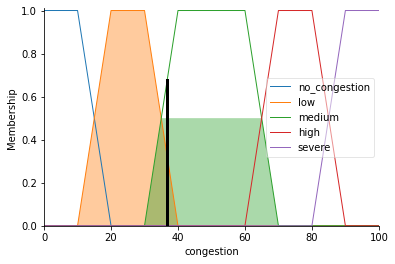

In [57]:
#Testing Output
congestion_simulation.compute()
print(f"Traffic Congestion Level: {congestion_simulation.output['congestion']}")
congestion.view(sim=congestion_simulation)

**Fuzzy Neural Netowrk**

**Fuzzy System (FS) v.s. Fuzzy Neural Netowrk (FNN)**
 
 Why do we need more than Fuzzy System?

- Fuzzy System (FS) is *static* and *rule-based*. It is rather stiff and cannot handle complexity well. 

Why do we wnat Fuzzy Neural Network?

- FNN as its name called has both fuzzy logic and nerual network. The key here is the fuzzy membership functions for neural networks to learn the data and this is crucial for us.

- As it is a Nerual Netowrk, it can adapt and learn over time more importantly, can handle much complex problems and learn rules!


Our choice of data:

In this FNN model, the data will be using the 

'trail_df' that has the advanced feature engineering variables and 
'hourly_dataframe' which is the initial dataframe that has all the variables

In [67]:
combined_df.columns


Index(['Date', 'Time Range', 'Direction', 'Total Cars', '< 5.6m', '>= 5.6m',
       '5.6m - 7.6m', '7.6m - 12.5m', '12.5m - 16.0m', '>= 16.0m',
       '16.0m - 24.0m', '>= 24.0m', 'temperature_2m', 'precipitation', 'rain',
       'showers', 'snowfall', 'visibility', 'wind_speed_10m', 'wind_speed_80m',
       'wind_direction_10m', 'wind_direction_80m', 'Vehicle Density per Lane',
       'Adjusted Visibility', 'Heavy Vehicle Percentage', 'Hour', 'Rush Hour',
       'Day of Week', 'Is Weekday'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

numeric_columns = [
        'Total Cars', 
        '< 5.6m', 
        '>= 5.6m',
        '5.6m - 7.6m', 
        '7.6m - 12.5m', 
        '12.5m - 16.0m', 
        '>= 16.0m',
        '16.0m - 24.0m', 
        '>= 24.0m', 
        'temperature_2m', 
        'precipitation', 
        'rain',
       'showers', 
       'snowfall', 
       'visibility', 
       'wind_speed_10m', 
       'wind_speed_80m',
       'wind_direction_10m', 
       'wind_direction_80m', 
       'Vehicle Density per Lane',
       'Adjusted Visibility', 
       'Heavy Vehicle Percentage', 
       'Hour', 'Rush Hour',
       'Day of Week', 
       'Is Weekday'
]

norm_df = combined_df.copy()
scaler = MinMaxScaler()
norm_df[numeric_columns] = scaler.fit_transform(norm_df[numeric_columns])

In [75]:
combined_df.columns

Index(['Date', 'Time Range', 'Direction', 'Total Cars', '< 5.6m', '>= 5.6m',
       '5.6m - 7.6m', '7.6m - 12.5m', '12.5m - 16.0m', '>= 16.0m',
       '16.0m - 24.0m', '>= 24.0m', 'temperature_2m', 'precipitation', 'rain',
       'showers', 'snowfall', 'visibility', 'wind_speed_10m', 'wind_speed_80m',
       'wind_direction_10m', 'wind_direction_80m', 'Vehicle Density per Lane',
       'Adjusted Visibility', 'Heavy Vehicle Percentage', 'Hour', 'Rush Hour',
       'Day of Week', 'Is Weekday'],
      dtype='object')

**Target Variable**

Our target variable, is using the previous developed Fuzzy System to iterate thorugh each row and output our Target Variable for FNN model.


Since there are around 8000 rows, the iteration might take a while to run.

Then we use our Fuzzy System Output range to define congestion level for further FNN target defining since it is neural network. 

- No Congestion: 0 ≤ Target Traffic Congestion Level < 20

- Low Congestion: 20 ≤ Target Traffic Congestion Level < 25

- Medium Congestion: 25 ≤ Target Traffic Congestion Level < 30

- High Congestion: 30 ≤ Target Traffic Congestion Level < 35

- Severe Congestion: Target Traffic Congestion Level ≥ 35

In [76]:
# Define a function to compute traffic congestion level for each row
def compute_congestion_level(row):
    # Set inputs for the fuzzy system
    congestion_simulation.input['vehicle_density'] = row['Vehicle Density per Lane']
    congestion_simulation.input['hv_percentage'] = row['Heavy Vehicle Percentage']
    congestion_simulation.input['precipitation'] = row['precipitation']
    congestion_simulation.input['visibility'] = row['Adjusted Visibility']
    congestion_simulation.input['wind_speed'] = row['wind_speed_10m']
    congestion_simulation.input['rush_hour'] = row['Rush Hour']
    congestion_simulation.input['is_weekday'] = row['Is Weekday']
    
    # Compute the output using the fuzzy system
    try:
        congestion_simulation.compute()
        return congestion_simulation.output['congestion']
    except Exception as e:
        print(f"Error processing row: {e}")
        return None

# Apply the function to each row in combined_df and store the output in a new column
combined_df['Target Traffic Congestion Level'] = combined_df.apply(compute_congestion_level, axis=1)

In [80]:
norm_df['Target Traffic Congestion Level'] = combined_df['Target Traffic Congestion Level']

In [82]:
norm_df['Target Traffic Congestion Level'].describe()

count    8806.000000
mean       30.192382
std         6.105495
min        17.822920
25%        33.220338
50%        33.250776
75%        33.250776
max        33.386535
Name: Target Traffic Congestion Level, dtype: float64

In [ ]:
def categorize_congestion_level(row):
    if row['Target Traffic Congestion Level'] < 20:
        return 0  # No Congestion
    elif row['Target Traffic Congestion Level'] < 25:
        return 1  # Low Congestion
    elif row['Target Traffic Congestion Level'] < 30:
        return 2  # Medium Congestion
    elif row['Target Traffic Congestion Level'] < 35:
        return 3  # High Congestion
    else:
        return 4  # Severe Congestion

norm_df['Categorized Traffic Congestion'] = norm_df.apply(categorize_congestion_level, axis=1)

      Target Traffic Congestion Level  Categorized Traffic Congestion
0                           33.250776                               3
1                           33.250776                               3
2                           33.250776                               3
3                           33.250776                               3
4                           33.250776                               3
...                               ...                             ...
8801                        33.264807                               3
8802                        33.260760                               3
8803                        33.243672                               3
8804                        33.253181                               3
8805                        33.258795                               3

[8806 rows x 2 columns]
